<a href="https://colab.research.google.com/github/rohit1998-pixel/rohit1998-pixel/blob/main/NTiO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
from tabulate import tabulate
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.integrate import trapz  # Import trapz for integration
df = pd.read_csv('/content/N-TiO2.csv')
print(df.head())
import os
print(os.getcwd())

# Directly specify the file path since __file__ does not work in interactive environments.
# If the file is in the same directory as the notebook, you can directly use:
file_path = '/content/N-TiO2.csv'
df = pd.read_csv(file_path)
print(df.head())
import os
print(os.getcwd())

3.7.1
       V        I1        I2        I3        I4        I5        I6  \
0 -1.096  0.000009  0.000010  0.000018  0.000012  0.000009  0.000009   
1 -1.092  0.000009  0.000010  0.000017  0.000011  0.000009  0.000009   
2 -1.088  0.000008  0.000009  0.000016  0.000011  0.000009  0.000008   
3 -1.084  0.000008  0.000009  0.000016  0.000011  0.000008  0.000008   
4 -1.080  0.000008  0.000008  0.000015  0.000010  0.000008  0.000008   

         I7        I8        I9       I10       I11  
0  0.000008  0.000011  0.000012  0.000011  0.000011  
1  0.000008  0.000011  0.000011  0.000011  0.000010  
2  0.000008  0.000011  0.000011  0.000010  0.000010  
3  0.000007  0.000010  0.000010  0.000010  0.000010  
4  0.000007  0.000010  0.000010  0.000010  0.000009  
/content
       V        I1        I2        I3        I4        I5        I6  \
0 -1.096  0.000009  0.000010  0.000018  0.000012  0.000009  0.000009   
1 -1.092  0.000009  0.000010  0.000017  0.000011  0.000009  0.000009   
2 -1.088  0.

In [310]:
Potential = df['V'].values
print(Potential)
I = ['I4','I5','I6','I7','I8','I9','I10','I11']  # example list of Y-axis column names
I = [df[I].values]


[-1.096 -1.092 -1.088 -1.084 -1.08  -1.076 -1.072 -1.068 -1.064 -1.06
 -1.056 -1.052 -1.048 -1.044 -1.04  -1.036 -1.032 -1.028 -1.024 -1.02
 -1.016 -1.012 -1.008 -1.004 -1.    -0.996 -0.992 -0.988 -0.984 -0.98
 -0.976 -0.972 -0.968 -0.964 -0.96  -0.956 -0.952 -0.948 -0.944 -0.94
 -0.936 -0.932 -0.928 -0.924 -0.92  -0.916 -0.912 -0.908 -0.904 -0.9
 -0.896 -0.892 -0.888 -0.884 -0.88  -0.876 -0.872 -0.868 -0.864 -0.86
 -0.856 -0.852 -0.848 -0.844 -0.84  -0.836 -0.832 -0.828 -0.824 -0.82
 -0.816 -0.812 -0.808 -0.804 -0.8   -0.796 -0.792 -0.788 -0.784 -0.78
 -0.776 -0.772 -0.768 -0.764 -0.76  -0.756 -0.752 -0.748 -0.744 -0.74
 -0.736 -0.732 -0.728 -0.724 -0.72  -0.716 -0.712 -0.708 -0.704 -0.7
 -0.696 -0.692 -0.688 -0.684 -0.68  -0.676 -0.672 -0.668 -0.664 -0.66
 -0.656 -0.652 -0.648 -0.644 -0.64  -0.636 -0.632 -0.628 -0.624 -0.62
 -0.616 -0.612 -0.608 -0.604 -0.6   -0.596 -0.592 -0.588 -0.584 -0.58
 -0.576 -0.572 -0.568 -0.564 -0.56  -0.556 -0.552 -0.548 -0.544 -0.54
 -0.536 -0.532 -0.528 

In [311]:
def get_min_max1():
    return -0.85, -0.6

min_Potential_range1, max_Potential_range1 = get_min_max1()
Potential_filtered_range1 = Potential[(Potential >= min_Potential_range1) & (Potential <= max_Potential_range1)]
print("min_Potential_range1 =", min_Potential_range1)
print("max_Potential_range1 =", max_Potential_range1)

def get_min_max2():
    return -0.15, 0.1

min_Potential_range2, max_Potential_range2 = get_min_max2()
Potential_filtered_range1 = Potential[(Potential >= min_Potential_range2) & (Potential <= max_Potential_range2)]
print("min_Potential_range2 =", min_Potential_range2)
print("max_Potential_range2 =", max_Potential_range2)


min_Potential_range1 = -0.85
max_Potential_range1 = -0.6
min_Potential_range2 = -0.15
max_Potential_range2 = 0.1


In [312]:
I_array = I[0]

In [313]:
# Define the each metal ion code
Metal_Ion = {
    'Cd(II)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Cu(II)': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}
print(Metal_Ion)

{'Cd(II)': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Cu(II)': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [314]:
# Potential ranges (using your defined functions)
potential_ranges = {  # Use curly braces and colons to define a dictionary
    'Cd(II)': get_min_max1(),
    'Cu(II)': get_min_max2()
}
print(potential_ranges)

{'Cd(II)': (-0.85, -0.6), 'Cu(II)': (-0.15, 0.1)}


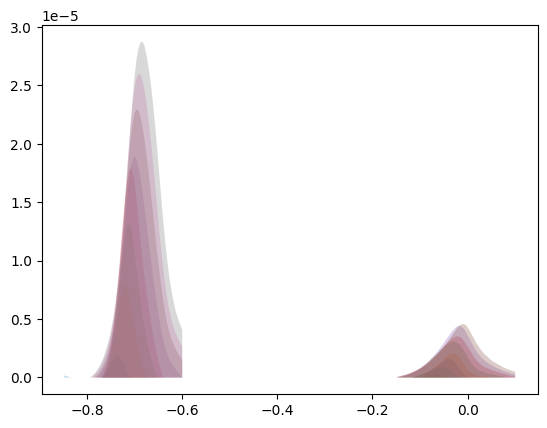

  Serial No.    Cd(II) Peak Potential    Cd(II) Current    Cd(II) Peak Area    Cd(II) Metal_Ion    Cu(II) Peak Potential    Cu(II) Current    Cu(II) Peak Area    Cu(II) Metal_Ion
------------  -----------------------  ----------------  ------------------  ------------------  -----------------------  ----------------  ------------------  ------------------
           1                   -0.736          6.19e-06         6.28138e-08                   0                   -0.068          9.59e-07         1.08087e-08                   1
           2                   -0.72           1.22e-05         3.45558e-07                   0                   -0.048          1.57e-06         4.72343e-08                   1
           3                   -0.712          1.74e-05         6.77533e-07                   0                   -0.036          2.21e-06         8.79803e-08                   1
           4                   -0.708          2.22e-05         1.02314e-06                   0          

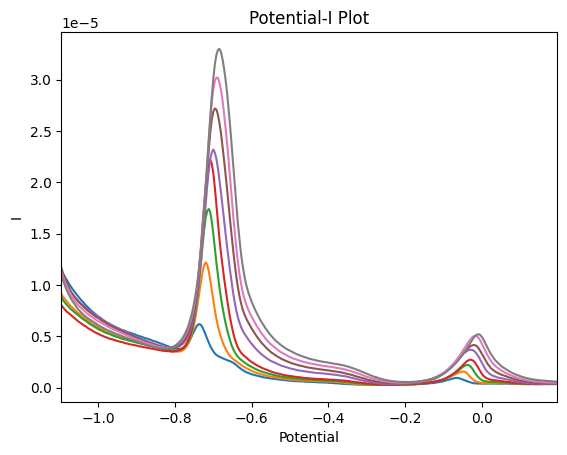

In [315]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from tabulate import tabulate
from scipy.integrate import trapz  # Import trapz for integration

# Load data from CSV file
data = pd.read_csv('/content/N-TiO2.csv')

# Assuming the CSV file has two columns: Potential and Current
Potential = data['V'].values
I_array = I[0]  # Extract the NumPy array from the list

# Define the potential ranges and corresponding metal ions
potential_ranges = {
    'Cd(II)': get_min_max1(),
    'Cu(II)': get_min_max2()
}

# Function to find max current and corresponding potential within a range
def find_max_in_range(potential_range, I_data):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    max_I_indices = np.argmax(I_in_range, axis=0)
    max_I_values = I_in_range[max_I_indices, np.arange(I_in_range.shape[1])]
    max_potential_values = Potential[indices_in_range][max_I_indices]
    return max_potential_values, max_I_values

# Function to calculate peak area
def calculate_peak_area(potential_range, I_data, baseline):
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_data[indices_in_range, :]
    peak_areas = []
    for i in range(I_in_range.shape[1]):
        # Subtract baseline current, ensuring values are non-negative
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, i] - baseline, 0)  # Clip negative values to 0
        # Calculate the peak area using trapezoidal rule for integration
        area = trapz(I_in_range_baseline_subtracted, Potential[indices_in_range])  # Integrate within the range
        peak_areas.append(area)
    return peak_areas  # Return the calculated peak areas

# Fill the area under the peak for each range
for metal_ion, potential_range in potential_ranges.items():
    min_potential, max_potential = potential_range
    indices_in_range = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
    I_in_range = I_array[indices_in_range, :]
    # Use the more robust baseline calculation as well for plotting
    baseline_start = I_array[indices_in_range[:int(len(indices_in_range) * 0.1)], :]
    baseline_end = I_array[indices_in_range[-int(len(indices_in_range) * 0.1):], :]
    baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
    for col in range(I_in_range.shape[1]):
        I_in_range_baseline_subtracted = np.maximum(I_in_range[:, col] - baseline, 0)  # Clip negative values to 0
        plt.fill_between(Potential[indices_in_range], I_in_range_baseline_subtracted, alpha=0.3, label=f'{metal_ion} Peak')  # Filling within the range
plt.show()
# Plot the data with x-axis range (you can adjust this for each range if needed)
plt.plot(Potential, I_array)
plt.xlim(Potential.min(), Potential.max())
plt.xlabel("Potential")
plt.ylabel("I")
plt.title("Potential-I Plot")



def print_table():
    headers = ["Serial No."]
    data = []
    for metal_ion, potential_range in potential_ranges.items():
        headers.append(f"{metal_ion} Peak Potential")
        headers.append(f"{metal_ion} Current")
        headers.append(f"{metal_ion} Peak Area")
        headers.append(f"{metal_ion} Metal_Ion")
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        # Calculate baseline current for the specific range
        min_potential, max_potential = potential_range
        baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
        # More robust baseline calculation:
        baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
        baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
        baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
        peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
        if metal_ion == 'Cd(II)':  # Initialize data list for the first range
            for j in range(I_array.shape[1]):
                data.append([j+1])
        for j in range(I_array.shape[1]):
            data[j].append(max_potentials[j])
            data[j].append(max_currents[j])
            data[j].append(peak_areas[j])
           # Handle potential index out of range issue:
            if j < len(Metal_Ion[metal_ion]):
                data[j].append(Metal_Ion[metal_ion][j])
            else:
                data[j].append("N/A")  # Or any placeholder you prefer

    print(tabulate(data, headers, tablefmt="solid_table"))

data_set = print_table()


In [316]:
def print_table():
    data_cd, data_cu = [], []  # Initialize separate data lists for Cd(II) and Cu(II)

    # Define headers for each metal ion separately
    headers_cd = ["Serial No.", "Cd(II) Peak Potential",
                   "Cd(II) Current", "Cd(II) Peak Area",
                   "Label0"]
    headers_cu = ["Serial No.", "Cu(II) Peak Potential",
                   "Cu(II) Current", "Cu(II) Peak Area",
                   "Label1"]

    for metal_ion, potential_range in potential_ranges.items():
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        # Calculate baseline current for the specific range
        min_potential, max_potential = potential_range
        baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
        # More robust baseline calculation:
        baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
        baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
        baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
        peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
        if metal_ion == 'Cd(II)':  # Initialize data list for Cd(II)
            for j in range(I_array.shape[1]):
                data_cd.append([j+1, max_potentials[j], max_currents[j],
                                peak_areas[j], Metal_Ion[metal_ion][j]])
        elif metal_ion == 'Cu(II)':  # Initialize data list for Cu(II)
            for j in range(I_array.shape[1]):
                data_cu.append([j+1, max_potentials[j], max_currents[j],
                                peak_areas[j], Metal_Ion[metal_ion][j]])

    # Create DataFrames for Cd(II) and Cu(II) using the correct headers
    df_cd = pd.DataFrame(data_cd, columns=headers_cd)
    df_cu = pd.DataFrame(data_cu, columns=headers_cu)

    # Return the DataFrames
    return df_cd, df_cu

# Call the function and assign the returned DataFrames to variables
df_cd, df_cu = print_table()

# Now you can use df_cd and df_cu outside the function
df_cd.head()
print(df_cd)
df_cu.head()
print(df_cu)

   Serial No.  Cd(II) Peak Potential  Cd(II) Current  Cd(II) Peak Area  Label0
0           1                 -0.736        0.000006      6.281375e-08       0
1           2                 -0.720        0.000012      3.455575e-07       0
2           3                 -0.712        0.000017      6.775325e-07       0
3           4                 -0.708        0.000022      1.023142e-06       0
4           5                 -0.700        0.000023      1.324430e-06       0
5           6                 -0.696        0.000027      1.782846e-06       0
6           7                 -0.692        0.000030      2.132229e-06       0
7           8                 -0.684        0.000033      2.478251e-06       0
   Serial No.  Cu(II) Peak Potential  Cu(II) Current  Cu(II) Peak Area  Label1
0           1                 -0.068    9.590000e-07      1.080867e-08       1
1           2                 -0.048    1.570000e-06      4.723433e-08       1
2           3                 -0.036    2.210000e-06

In [317]:
def print_table():
    data_cd, data_cu = [], []  # Initialize separate data lists for Cd(II) and Cu(II)

    # Define headers for each metal ion separately
    headers_cd = ["Cd(II) Peak Potential",
                   "Cd(II) Current", "Cd(II) Peak Area",
                   "Label0"]
    headers_cu = ["Cu(II) Peak Potential",
                   "Cu(II) Current", "Cu(II) Peak Area",
                   "Label1"]

    for metal_ion, potential_range in potential_ranges.items():
        max_potentials, max_currents = find_max_in_range(potential_range, I_array)
        # Calculate baseline current for the specific range
        min_potential, max_potential = potential_range
        baseline_indices = np.where((Potential >= min_potential) & (Potential <= max_potential))[0]
        # More robust baseline calculation:
        baseline_start = I_array[baseline_indices[:int(len(baseline_indices) * 0.1)], :]
        baseline_end = I_array[baseline_indices[-int(len(baseline_indices) * 0.1):], :]
        baseline = np.mean(np.concatenate((baseline_start, baseline_end)))
        peak_areas = calculate_peak_area(potential_range, I_array, baseline)  # Call the function to get peak areas
        if metal_ion == 'Cd(II)':  # Initialize data list for Cd(II)
            for j in range(I_array.shape[1]):
                data_cd.append([max_potentials[j], max_currents[j],
                                peak_areas[j], Metal_Ion[metal_ion][j]])
        elif metal_ion == 'Cu(II)':  # Initialize data list for Cu(II)
            for j in range(I_array.shape[1]):
                data_cu.append([max_potentials[j], max_currents[j],
                                peak_areas[j], Metal_Ion[metal_ion][j]])

    # Create DataFrames for Cd(II) and Cu(II) using the correct headers
    df_cd = pd.DataFrame(data_cd, columns=headers_cd)
    df_cu = pd.DataFrame(data_cu, columns=headers_cu)

    # Return the DataFrames
    return df_cd, df_cu

# Call the function and assign the returned DataFrames to variables
df_cd, df_cu = print_table()

# Now you can use df_cd and df_cu outside the function
df_cd.head()
print(df_cd)
df_cu.head()
print(df_cu)

   Cd(II) Peak Potential  Cd(II) Current  Cd(II) Peak Area  Label0
0                 -0.736        0.000006      6.281375e-08       0
1                 -0.720        0.000012      3.455575e-07       0
2                 -0.712        0.000017      6.775325e-07       0
3                 -0.708        0.000022      1.023142e-06       0
4                 -0.700        0.000023      1.324430e-06       0
5                 -0.696        0.000027      1.782846e-06       0
6                 -0.692        0.000030      2.132229e-06       0
7                 -0.684        0.000033      2.478251e-06       0
   Cu(II) Peak Potential  Cu(II) Current  Cu(II) Peak Area  Label1
0                 -0.068    9.590000e-07      1.080867e-08       1
1                 -0.048    1.570000e-06      4.723433e-08       1
2                 -0.036    2.210000e-06      8.798033e-08       1
3                 -0.032    2.730000e-06      1.331197e-07       1
4                 -0.032    3.690000e-06      2.708770e-07    

In [318]:
df_cd.head()

,Cd(II) Peak Potential,Cd(II) Current,Cd(II) Peak Area,Label0
0,-0.736,0.000006,6.281375e-08,0
1,-0.720,0.000012,3.455575e-07,0
2,-0.712,0.000017,6.775325e-07,0
3,-0.708,0.000022,1.023142e-06,0
4,-0.700,0.000023,1.324430e-06,0


In [319]:
df_cu.head()

,Cu(II) Peak Potential,Cu(II) Current,Cu(II) Peak Area,Label1
0,-0.068,9.590000e-07,1.080867e-08,1
1,-0.048,1.570000e-06,4.723433e-08,1
2,-0.036,2.210000e-06,8.798033e-08,1
3,-0.032,2.730000e-06,1.331197e-07,1
4,-0.032,3.690000e-06,2.708770e-07,1


In [320]:
from sklearn.preprocessing import StandardScaler

In [321]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [322]:
# Assuming 'Metal_Ion' is the target variable
target_cd = df_cd['Label0']
features_cd = df_cd.drop('Label0', axis=1)

target_cu = df_cu['Label1']
features_cu = df_cu.drop('Label1', axis=1)

print("Cd(II) Features:")
print(features_cd.head())
print("\nCd(II) Target:")
print(target_cd.head())

print("\nCu(II) Features:")
print(features_cu.head())
print("\nCu(II) Target:")
print(target_cu.head())

Cd(II) Features:
   Cd(II) Peak Potential  Cd(II) Current  Cd(II) Peak Area
0                 -0.736        0.000006      6.281375e-08
1                 -0.720        0.000012      3.455575e-07
2                 -0.712        0.000017      6.775325e-07
3                 -0.708        0.000022      1.023142e-06
4                 -0.700        0.000023      1.324430e-06

Cd(II) Target:
0    0
1    0
2    0
3    0
4    0
Name: Label0, dtype: int64

Cu(II) Features:
   Cu(II) Peak Potential  Cu(II) Current  Cu(II) Peak Area
0                 -0.068    9.590000e-07      1.080867e-08
1                 -0.048    1.570000e-06      4.723433e-08
2                 -0.036    2.210000e-06      8.798033e-08
3                 -0.032    2.730000e-06      1.331197e-07
4                 -0.032    3.690000e-06      2.708770e-07

Cu(II) Target:
0    1
1    1
2    1
3    1
4    1
Name: Label1, dtype: int64


In [323]:
from sklearn.model_selection import train_test_split

# Splitting Cd(II) data
X_train_cd, X_test_cd, y_train_cd, y_test_cd = train_test_split(
    features_cd, target_cd, test_size=0.2, random_state=42
)

# Splitting Cu(II) data
X_train_cu, X_test_cu, y_train_cu, y_test_cu = train_test_split(
    features_cu, target_cu, test_size=0.2, random_state=42
)

print("Cd(II) Training Features Shape:", X_train_cd.shape)
print("Cd(II) Training Target Shape:", y_train_cd.shape)
print("Cd(II) Testing Features Shape:", X_test_cd.shape)
print("Cd(II) Testing Target Shape:", y_test_cd.shape)

print("\nCu(II) Training Features Shape:", X_train_cu.shape)
print("Cu(II) Training Target Shape:", y_train_cu.shape)
print("Cu(II) Testing Features Shape:", X_test_cu.shape)
print("Cu(II) Testing Target Shape:", y_test_cu.shape)

Cd(II) Training Features Shape: (6, 3)
Cd(II) Training Target Shape: (6,)
Cd(II) Testing Features Shape: (2, 3)
Cd(II) Testing Target Shape: (2,)

Cu(II) Training Features Shape: (6, 3)
Cu(II) Training Target Shape: (6,)
Cu(II) Testing Features Shape: (2, 3)
Cu(II) Testing Target Shape: (2,)


In [324]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
scaler_cd = StandardScaler()
scaler_cu = StandardScaler()

# Fit scalers to training data (important to only fit on training data!)
scaler_cd.fit(X_train_cd)
scaler_cu.fit(X_train_cu)

# Now you can transform both training and testing data
X_train_cd_scaled = scaler_cd.transform(X_train_cd)
X_test_cd_scaled = scaler_cd.transform(X_test_cd)

X_train_cu_scaled = scaler_cu.transform(X_train_cu)
X_test_cu_scaled = scaler_cu.transform(X_test_cu)

print("Scaled Cd(II) Training Features Sample:")
print(X_train_cd_scaled[:5])  # Print first 5 rows of scaled Cd(II) training features

print("\nScaled Cu(II) Training Features Sample:")
print(X_train_cu_scaled[:5])  # Print first 5 rows of scaled Cu(II) training features

Scaled Cd(II) Training Features Sample:
[[-1.84740446 -1.80761562 -1.48077168]
 [ 1.28515093  1.25154323  1.45035186]
 [-0.40160966 -0.52849698 -0.73481298]
 [ 0.32128773  0.13331284  0.05019449]
 [-0.16064387  0.0192077  -0.31541666]]

Scaled Cu(II) Training Features Sample:
[[-1.90443316 -1.54775925 -1.29951091]
 [ 1.26962211  1.25041353  1.35877723]
 [-0.21160368 -0.72236096 -0.85000912]
 [ 0.          0.25412942  0.21530906]
 [ 0.         -0.37926974 -0.58708606]]


In [325]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model for Cd(II)
model_cd = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_cd_scaled.shape[1],), use_bias=True, name='input_layer'),
    layers.Dense(64, activation='relu', use_bias=True),
    layers.Dense(1, activation='linear', use_bias=True, name='output_layer')  # Output layer for binary classification
])

# Model for Cu(II) - Structure remains the same, but trained on different data
model_cu = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_cu_scaled.shape[1],), use_bias=True, name='input_layer'),
    layers.Dense(64, activation='relu', use_bias=True),
    layers.Dense(1, activation='linear', use_bias=True, name='output_layer')
])

# Compile the models
model_cd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the models
history_cd = model_cd.fit(X_train_cd_scaled, y_train_cd, epochs=20, batch_size=32, validation_split=0.2)
history_cu = model_cu.fit(X_train_cu_scaled, y_train_cu, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the models on test data
loss_cd, accuracy_cd = model_cd.evaluate(X_test_cd_scaled, y_test_cd)
loss_cu, accuracy_cu = model_cu.evaluate(X_test_cu_scaled, y_test_cu)

print("Cd(II) Model Test Accuracy:", accuracy_cd)
print("Cu(II) Model Test Accuracy:", accuracy_cu)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.0834 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 43ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 42ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 57ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 

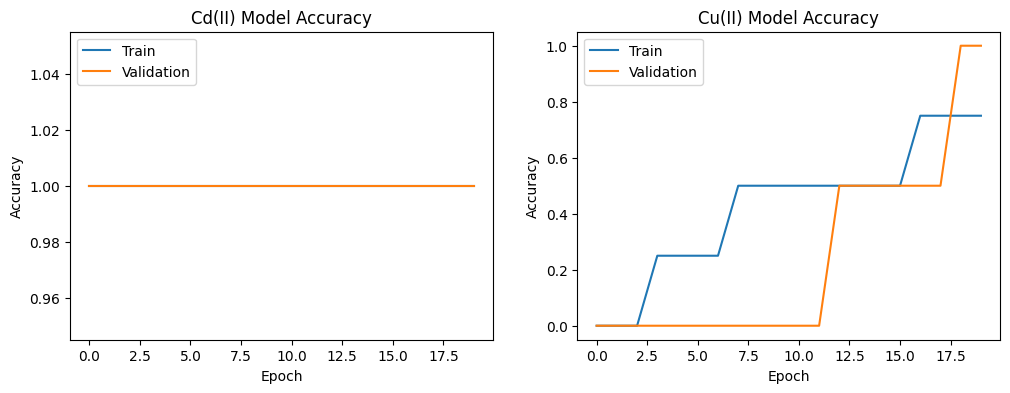

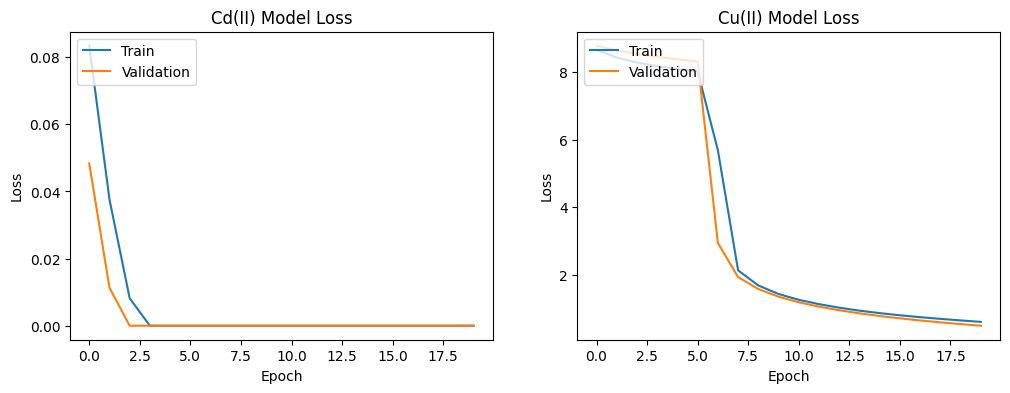

In [326]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cd.history['accuracy'])
plt.plot(history_cd.history['val_accuracy'])
plt.title('Cd(II) Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cu.history['accuracy'])
plt.plot(history_cu.history['val_accuracy'])
plt.title('Cu(II) Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cd.history['loss'])
plt.plot(history_cd.history['val_loss'])
plt.title('Cd(II) Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cu.history['loss'])
plt.plot(history_cu.history['val_loss'])
plt.title('Cu(II) Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [327]:
input_data = (-0.036,2.210000e-06,8.798033e-08)  # Add a fourth feature to match the scaler's expectation
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

# Define a threshold for classification (adjust as needed)
threshold = 0.5

# Classify based on proximity to 0 or 1
if prediction[0][0] < threshold:  # Check if closer to 0
  print('The metal ion is Cd(II)')
elif prediction[0][0] >= threshold:  # Check if closer to 1
  print('The metal ion is Cu(II)')
else:
  print('The metal ion is absent')

1/1 [==============================] - 0s 41ms/step
[[1.6929502]]
The metal ion is Cu(II)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
